In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
result1 = np.zeros((310,900))
i = 0

In [3]:
months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(21,331)]
i =0
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.TEMP.nc')
        plotvar = data.variables['TEMP'][0,:,:]
        plotvar[plotvar == -1.0] = np.nan
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        lont = lont[271:365,650:900]
        latt = latt[271:365,650:900]
        plot1 = plotvar[20:37,271:365,650:900]
        plot1 = np.nanmean(plot1, axis = 0)
        aveplot = np.nanmean(plot1,axis=0)
        result1[i,:] = aveplot[:]
        i = i + 1

In [4]:
A = np.arange(310)
B = np.arange(900)
xx, yy = np.meshgrid(B, A)

In [23]:
nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,140,150,160,170,180,190,200,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [-1.05,-1.0,-0.95,-0.9,-0.85,-0.8,-0.75,-0.7,-0.65,-0.6,-0.55,-0.5,-0.45,-0.4,-0.35]
nice_levels = [-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************


In [24]:
result1.max()

1.9185186624526978

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'spacing'
  


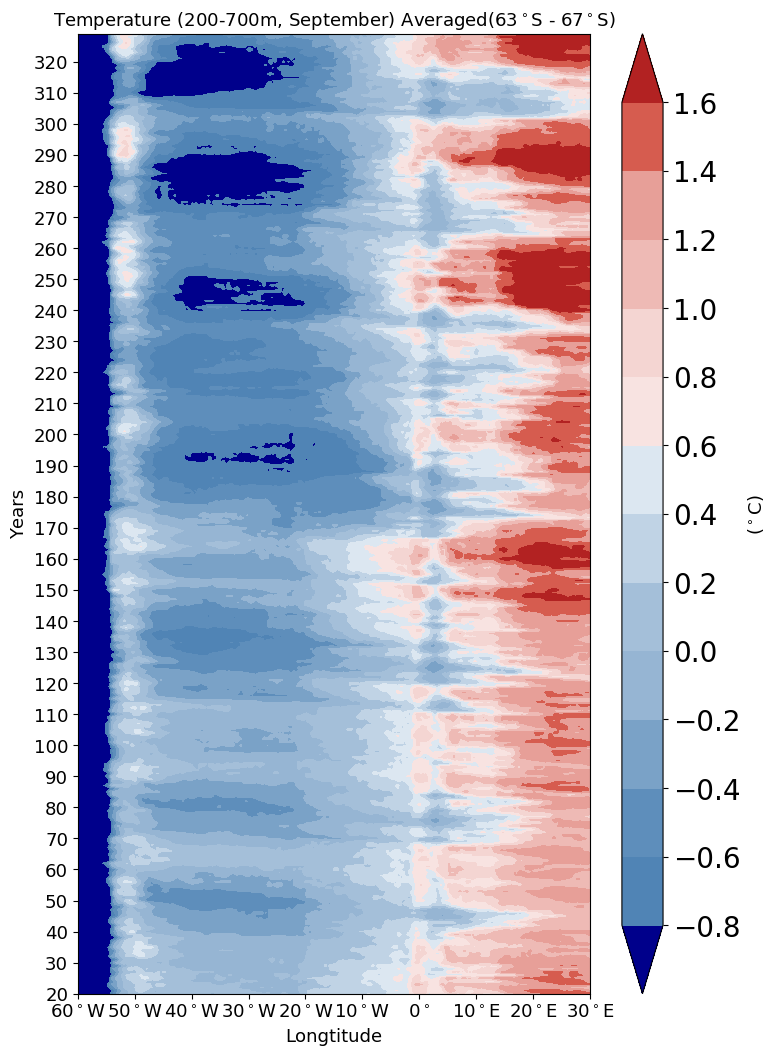

In [25]:
# plot the result
fig = plt.figure(figsize=(8, 12),dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'13'}
im = ax0.contourf(xx, yy, result1,cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels,extend='both')
im.cmap.set_over('firebrick')
im.cmap.set_under('darkblue')
#plt.vlines(530, 0, 119, colors = "y",linestyles = "dashed")
#plt.vlines(530, 0, 159, colors = "y",linestyles = "dashed")
#CS = ax0.contour(xx[:,430],yy[:,430],colors = 'r')
cbar = fig.colorbar(im, ax=ax0, ticks=nice_levels,extendfrac='auto')
cbar.ax.tick_params(labelsize=20)
cbar.set_label('($^\circ$C)', **my_font)
#plt.clabel(CS, inline=0.1, fontsize=10)

#############################################################################
##设定X坐标值
plt.xticks(range(0,901,100), ['60$^\circ$W','50$^\circ$W','40$^\circ$W','30$^\circ$W', '20$^\circ$W', '10$^\circ$W', '0$^\circ$'\
                             ,'10$^\circ$E','20$^\circ$E','30$^\circ$E'],**my_font)
plt.yticks(range(0,301,10), ['20', '30','40', '50','60','70', '80','90', '100','110','120','130','140','150','160','170',\
                             '180','190','200', '210','220','230', '240','250', '260','270','280','290','300','310','320','330'],**my_font)
plt.xlabel('Longtitude',**my_font)
plt.ylabel('Years',**my_font)
ax0.set_title('Temperature (200-700m, September) Averaged(63$^\circ$S - 67$^\circ$S)',**my_font)
plt.savefig("salt408m.png",bbox_inches='tight',dpi=fig.dpi)